In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = "globalpowerplantdatabasev110/global_power_plant_database.csv"

In [2]:
power = pd.read_csv(file)
power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print(power.describe(), power.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28664 entries, 0 to 28663
Data columns (total 22 columns):
country                     28664 non-null object
country_long                28664 non-null object
name                        28644 non-null object
gppd_idnr                   28664 non-null object
capacity_mw                 28664 non-null float64
latitude                    28664 non-null float64
longitude                   28664 non-null float64
fuel1                       28661 non-null object
fuel2                       1705 non-null object
fuel3                       296 non-null object
fuel4                       108 non-null object
commissioning_year          14952 non-null float64
owner                       18093 non-null object
source                      28664 non-null object
url                         28664 non-null object
geolocation_source          28243 non-null object
year_of_capacity_data       16145 non-null float64
generation_gwh_2013         439 non-null 

C:\Users\seapea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Standard deviation of Megawatt Capacity aggregated by country')

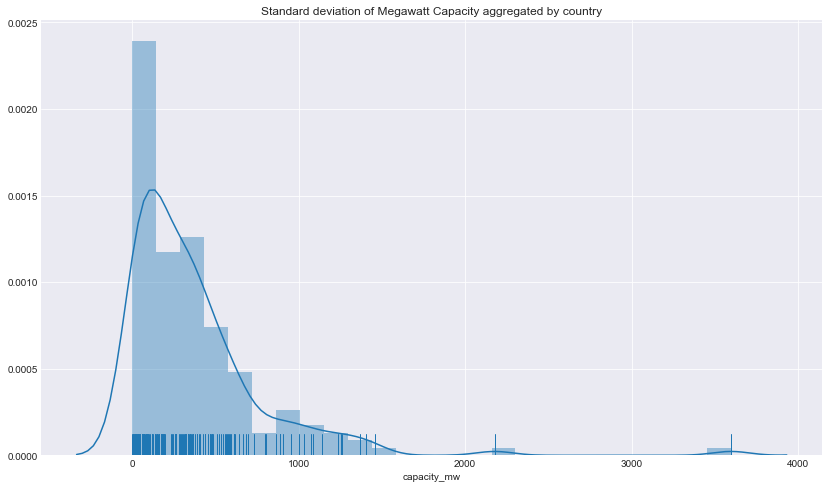

In [4]:
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')
sns.distplot(power.groupby('country')['capacity_mw'].agg(np.std).dropna(), rug=True).set_title('Standard deviation of Megawatt Capacity aggregated by country')

In [6]:
print(power.fuel2.describe())#, "\n\n", power.fuel3.describe(), "\n\n", power.fuel4.describe())
print(power.fuel1.unique())
# print(power.fuel2.unique())
# print(power.fuel3.unique())
# print(power.fuel4.unique())
print(power['fuel1'].value_counts()[:6])

count     1705
unique      11
top        Gas
freq      1010
Name: fuel2, dtype: object
['Hydro' 'Gas' 'Other' 'Oil' 'Wind' 'Nuclear' 'Coal' 'Solar' 'Waste'
 'Biomass' 'Wave and Tidal' 'Geothermal' nan 'Cogeneration' 'Storage'
 'Petcoke']
Hydro    7034
Solar    5424
Wind     5084
Gas      3068
Oil      2925
Coal     2172
Name: fuel1, dtype: int64


In [7]:
power1 = power[(power['fuel1'].notnull()) & (power['commissioning_year'].notnull())]
power1['commissioning_year'] = power1['commissioning_year'].map(int)

C:\Users\seapea\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
power2 = pd.DataFrame()
for val in power['fuel1'].value_counts()[:2].index.values:
    power2.append(power1[power1['fuel1'] == val])
    power2.append(1)

TypeError: cannot concatenate object of type "<class 'int'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [11]:
power2

""
